# MaD - Macromolecular Descriptors

This notebook contains all the necessary information to run MaD. If you want to try it fast, just check the code within the minimal examples. You'll find the solutions in the "individual_solutions" and "assembly_models" subfolders within the folder created for your assembly, which is in the main "results" folder.

Explanations of the basic output is explained in section 1A.

For the main parameters that has been tweaked at some point for predictions and why, check section 2 C, D E and F. 

All examples apart from the 3 mentioned use default parameters. Meaning, MaD is as plug-and-play as it gets.

1. **Minimal examples**
    1. Homomultimer: VAT complex (7 Å) + output explanation
    1. Heteromultimers: NMDA receptor (6 Å)
1. **Other examples and tweaking parameters**
    1. RAG complex (5 Å)
    1. Actin:tropomyosin (8 Å)
    1. Microtubule and kinesin (9 Å) (tweak)
    1. MecA-ClpC complex (10 Å) (tweak)
    1. Kainate receptor GluK2 (11.6 Å) (tweak)
    1. Beta-galactosidase (13 Å) (tweak)
    1. Simulated assemblies (10 Å)
1. **Ensemble docking with GroEL**
1. **Anchor files**

Note that you may need to adjust the path to structure files depending on how you downloaded the software and the testing data. The testing data may be found on our website: https://www.epfl.ch/labs/lbm/resources/

## 1. Minimal examples

### A. Homomultimer: VAT complex

This minimal code predicts the assembly of the VAT complex, with an experimental map at a resolution of 7 A. A single monomer is considered and the assembly is predicted despite conformational differences between protomers between 1 and 3.5 A of RMSD-Ca, and missing densities in the experimental map.

For homomultimeric assemblies or repeted components in general, only a single copy of the repeated structure is required.

Results are saved in the "results" folder. The name of the results folder is built from the filename of the map and those of the components, along with the resolution, number of copies for each component, and isovalue. New attempts on the same system will create folders with an incremented path, e.g. "..._1", "..._2", and so on. 

* Individual component solutions are stored in the "individual_solutions" subfolder.
* Assembly models, if generated, are stored in the "assembly_models" subfolder. 
* To look at the files used for docking, a copy is available in the "initial_files" folder for better reproducibility.
* For explanations about the "anchor_files" folder within individual_solutions, please see section 4 "anchor files"

In general, descriptors will be stored in the "dsc_db" folder. Restarting this example will be faster, as all descriptors have been computed and will only be loaded.



In [ ]:
from mad import MaD

# Make instance
mad = MaD.MaD()

# Add map (specify resolution after path), then add components 
mad.add_map("../Small_dataset/5g4f/emd_3436_processed.mrc", 7)

# Add component and specify number of copies (VAT complex is hexameric)
mad.add_subunit("../Small_dataset/5g4f/5g4f_subunit.pdb", n_copies=6)

# Get solutions
mad.run()

# Build assembly
mad.build_assembly()

MaD> Added: density map emd_3436_processed, resolution 7.00 A
MaD> Added: subunit ../Small_dataset/5g4f/5g4f_subunit.pdb
MaD> Created output folder: results/emd_3436_processed_5g4f_subunitx6_res7.000_iso0.000_1

MaD> Processing map emd_3436_processed
MaD> Building map space for emd_3436_processed_mad...
MaD> Finding anchors in emd_3436_processed_mad... 
MaD> Orienting 1741 anchors...
MaD> Generating descriptors from 9883 oriented anchors...


#### Explanation of output

1. Descriptors are generated for all structures (anchor detection, orientation, and description). If they're available in the database (dsc_db folder), descriptors are loaded instead.
1. Matching occurs:
    1. Local descriptor matching: identifies pair that may yield a valid transformation of the subunit into the density.
    1. Filtering: ranking according to global anchor matching, then clustering. One solution per cluster is kept.
    1. Local rigid refinement to fix inaccuracies from anchor coordinates and orientation.
1. Scoring includes:
    1. Repeat: the repeatability, or percentage of anchors that have a correspondence in the target density.
    1. Weight: the size of the corresponding cluster. The cluster includes the descriptor pairs that agree with that particular localization within the target cryo-EM map.
    1. mCC: map cross-correlation.
    1. RWmCC: the product of the previous scores. It considers structural similarity at all 3 levels considered in our procedure.
1. Assembly building is simply a combinatorial exploration of the different assemblies respecting the target assembly's stoichiometry.
    1. Pairwise overlap (i.e. structural clashes estimated from non-zero voxel values at same point in space) are computed. The table is shown. Columns are not labelled for visualization purposes but are in the same order as the rows, each one corresponding to a solution in the individual_solutions subfolder. In the case of a heteromultimeric assembly, another folder called "subcomplexes" will be created. It will contain either a copy of the component solutions if a single copy is expected, otherwise it will contain subcomplexes of that component alone at the expected stoichiometry (as defined by the n_copies parameter, see section 2A for an example).
    1. Relevant values are summed depending on the combination of solutions. 
1. Output models are ranked in order of increasing overlap (either sum, standard deviations, or maximum value). 
    1. For each model, the cross-correlation (CC) with the target cryo-EM map is reported. The overlap sum, standard deviation and maximum are reported as well. The composition column refers to the individual component solutions that have been combined for the model. Each number corresponds to the index of that solution both in the overlap table and in the individual_solutions folder (or subcomplexes folder if the assembly is heteromultimeric).

### A. Heteromultimer: NMDA receptor

This starts an example on the NMDA receptor, with an experimental map at a resolution of 6 A. All 5 components are added separately. 

Results are saved in the "results" folder. The name of the results folder is built from the filename of the map and those of the components, along with the resolution, number of copies for each component, and isovalue. New attempts on the same system will create folders with an incremented path, e.g. "..._1", "..._2", and so on. 

* Individual component solutions are stored in the "individual_solutions" subfolder.
* The **"subcomplexes" folder contain the final components used to build heteromultimeric assemblies**. It contains either a copy of the individual solutions if the component is not repeated in the assembly, otherwise, it will contain subcomplexes of that component containing the requested number of copies. This is skipped in the case of homomultimeric assemblies, which was the case in the previous example.
* Assembly models, if generated, are stored in the "assembly_models" subfolder. The "composition" will refer to the files in the subcomplexes folder.
* To look at the files used for docking, a copy is available in the "initial_files" folder for better reproducibility.
* For explanations about the "anchor_files" folder within individual_solutions, please see section 4 "anchor files"

In general, descriptors will be stored in the "dsc_db" folder. Restarting this example will be faster, as all descriptors have been computed and will only be loaded.

##### Notes about output models in this case
4 models are generated. The first one is the expected model. The second one has two subunits swapped; they correspond to the two GluN1 subunits, which may be swapped despite a slight conformational difference between them. The third shows an inverted position of the Fab domain. This assembly has a lower score than the first two, and the scores of the individual solutions of the Fab clearly clear out any uncertainty (424 vs 6). The fourth model has the swapped GluN1 subunits and the inverted Fab domains.

In [2]:
from mad import MaD

# Make instance
mad = MaD.MaD()

# Add map (specify resolution after path), then add components 
mad.add_map("../Small_dataset/5up2/emd_8581_processed.mrc", 6)
mad.add_subunit("../Small_dataset/5up2/5up2_subA.pdb")
mad.add_subunit("../Small_dataset/5up2/5up2_subB.pdb")
mad.add_subunit("../Small_dataset/5up2/5up2_subC.pdb")
mad.add_subunit("../Small_dataset/5up2/5up2_subD.pdb")
mad.add_subunit("../Small_dataset/5up2/5up2_Fab.pdb")

# Get solutions per component
mad.run()

# Build assembly
mad.build_assembly()

MaD> Added: density map emd_8581_processed, resolution 6.00 A
MaD> Added: subunit ../Small_dataset/5up2/5up2_subA.pdb
MaD> Added: subunit ../Small_dataset/5up2/5up2_subB.pdb
MaD> Added: subunit ../Small_dataset/5up2/5up2_subC.pdb
MaD> Added: subunit ../Small_dataset/5up2/5up2_subD.pdb
MaD> Added: subunit ../Small_dataset/5up2/5up2_Fab.pdb
MaD> Created output folder: results/emd_8581_processed_5up2_Fabx1.5up2_subAx1.5up2_subBx1.5up2_subCx1.5up2_subDx1_res6.000_iso0.000
MaD> 7555 descriptors for emd_8581_processed found in database
MaD> 1652 descriptors for 5up2_subA found in database
MaD> 1599 descriptors for 5up2_subB found in database
MaD> 1641 descriptors for 5up2_subC found in database
MaD> 1576 descriptors for 5up2_subD found in database
MaD> 778 descriptors for 5up2_Fab found in database
MaD> Matching descriptors (emd_8581_processed vs. 5up2_subA) (cc = 0.60)...
MaD> Filtering descriptor pairs (map emd_8581_processed vs. structure 5up2_subA) (weight=4, n_samples=60*1)...
MaD> Refi

## 2. Other examples and tweaking parameters

#### RAG complex at 5 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

In this case, subB is present in 2 copies. When building the assembly, a subcomplex will be made from its solutions alone before considering the resulting sub-assemblies for final building. This is to minimize the combinatorial cost. Subcomplexes are found in the "subcomplexes" subfolder.

**Pay attention when looking at the composition of the final model: the index shown refers to subcomplexes for the repeated components.** SubB, for example, has been merged into a subcomplex.

Subunits A and C are mostly similar, except for a major difference in their Zinc-finger domain's orientation. Both localizations are found from either, but model building highlights the best model through structural clashes.

In [3]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("../Small_dataset/6dbl/emd_7845_processed.mrc", 5)
mad.add_subunit("../Small_dataset/6dbl/6dbl_subA.pdb", 1)
mad.add_subunit("../Small_dataset/6dbl/6dbl_subB.pdb", 2)
mad.add_subunit("../Small_dataset/6dbl/6dbl_subC.pdb", 1)

mad.run()
mad.build_assembly()


MaD> Added: density map emd_7845_processed, resolution 5.00 A
MaD> Added: subunit ../Small_dataset/6dbl/6dbl_subA.pdb
MaD> Added: subunit ../Small_dataset/6dbl/6dbl_subB.pdb
MaD> Added: subunit ../Small_dataset/6dbl/6dbl_subC.pdb
MaD> Created output folder: results/emd_7845_processed_6dbl_subAx1.6dbl_subBx2.6dbl_subCx1_res5.000_iso0.000
MaD> 9409 descriptors for emd_7845_processed found in database
MaD> 3837 descriptors for 6dbl_subA found in database
MaD> 2246 descriptors for 6dbl_subB found in database
MaD> 4161 descriptors for 6dbl_subC found in database
MaD> Matching descriptors (emd_7845_processed vs. 6dbl_subA) (cc = 0.60)...
MaD> Filtering descriptor pairs (map emd_7845_processed vs. structure 6dbl_subA) (weight=4, n_samples=60*1)...
MaD> Refining emd_7845_processed in 6dbl_subA...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
------------------------------------------
|  0 |  24.90 |     54 |   0.51 | 686.39 |
---------------------------

#### Actin:tropomyosin at 8 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

In [4]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("../Small_dataset/3j4k/emd_5751_processed.mrc", 8)
mad.add_subunit("../Small_dataset/3j4k/3j4k_subunit.pdb", 5)
mad.run()
mad.build_assembly()

MaD> Added: density map emd_5751_processed, resolution 8.00 A
MaD> Added: subunit ../Small_dataset/3j4k/3j4k_subunit.pdb
MaD> Created output folder: results/emd_5751_processed_3j4k_subunitx5_res8.000_iso0.000
MaD> 3328 descriptors for emd_5751_processed found in database
MaD> 758 descriptors for 3j4k_subunit found in database
MaD> Matching descriptors (emd_5751_processed vs. 3j4k_subunit) (cc = 0.60)...
MaD> Filtering descriptor pairs (map emd_5751_processed vs. structure 3j4k_subunit) (weight=4, n_samples=60*5)...
MaD> Refining emd_5751_processed in 3j4k_subunit...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
------------------------------------------
|  0 |  29.20 |     74 |   0.60 | 1305.32 |
|  1 |  25.55 |     35 |   0.68 | 608.93 |
|  2 |  25.55 |     38 |   0.61 | 590.31 |
|  3 |  25.55 |     19 |   0.63 | 305.83 |
|  4 |  24.09 |     18 |   0.61 | 264.26 |
|  5 |   3.65 |     15 |   0.46 |  25.03 |
|  6 |   3.65 |      4 |   0.47 |   6.

#### Microtubule and kinesin at 9 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

In this case, the density of the kinesin is poorly resolved, the voxel spacing is large (2 A) and the tubulin protomers have residual densities from nearby subunits. To make sure the solutions are highlighted, a lower cross-correlation threshold for descriptor matching is set (0.5 instead of the default 0.6), and more descriptor pairs are processed during clustering. There is some residual structural clashes after the refinement, probably due to a different docking procedures adopted when the assembly was first published.

The first model built is the expected model. 

In [5]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("../Small_dataset/2p4n/emd_1340_processed.mrc", 9)
mad.add_subunit("../Small_dataset/2p4n/2p4n_subA.pdb")
mad.add_subunit("../Small_dataset/2p4n/2p4n_subB.pdb")
mad.add_subunit("../Small_dataset/2p4n/2p4n_subC.pdb")

mad.run(cc_threshold=0.5, n_samples=80)
mad.build_assembly()

MaD> Added: density map emd_1340_processed, resolution 9.00 A
MaD> Added: subunit ../Small_dataset/2p4n/2p4n_subA.pdb
MaD> Added: subunit ../Small_dataset/2p4n/2p4n_subB.pdb
MaD> Added: subunit ../Small_dataset/2p4n/2p4n_subC.pdb
MaD> Created output folder: results/emd_1340_processed_2p4n_subAx1.2p4n_subBx1.2p4n_subCx1_res9.000_iso0.000
MaD> 1713 descriptors for emd_1340_processed found in database
MaD> 380 descriptors for 2p4n_subA found in database
MaD> 356 descriptors for 2p4n_subB found in database
MaD> 310 descriptors for 2p4n_subC found in database
MaD> Matching descriptors (emd_1340_processed vs. 2p4n_subA) (cc = 0.50)...
MaD> Filtering descriptor pairs (map emd_1340_processed vs. structure 2p4n_subA) (weight=4, n_samples=80*1)...
MaD> Refining emd_1340_processed in 2p4n_subA...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
------------------------------------------
|  0 |  35.96 |      6 |   0.53 | 113.68 |
|  1 |   8.99 |      4 |   0.4

#### MecA-ClpC at 10 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

At these resolutions, secondary structure starts to merge into more uniform densities. This is where a minimum size requirement for components need to be imposed. While the ClpC monomers are fitted successfully, there is not enough information for reliable descriptor to be built for the smaller (~25 kDa) MecA subunits (see figure below)

The lower resolution requires to tweak the descriptor cross-correlation threshold to 0.5 (down from 0.6 by default) and the number of descriptor pairs for clustering (100, up from 60 by default).

Regardless, the first model built is the expected model (minus MecA subunits)

<div>
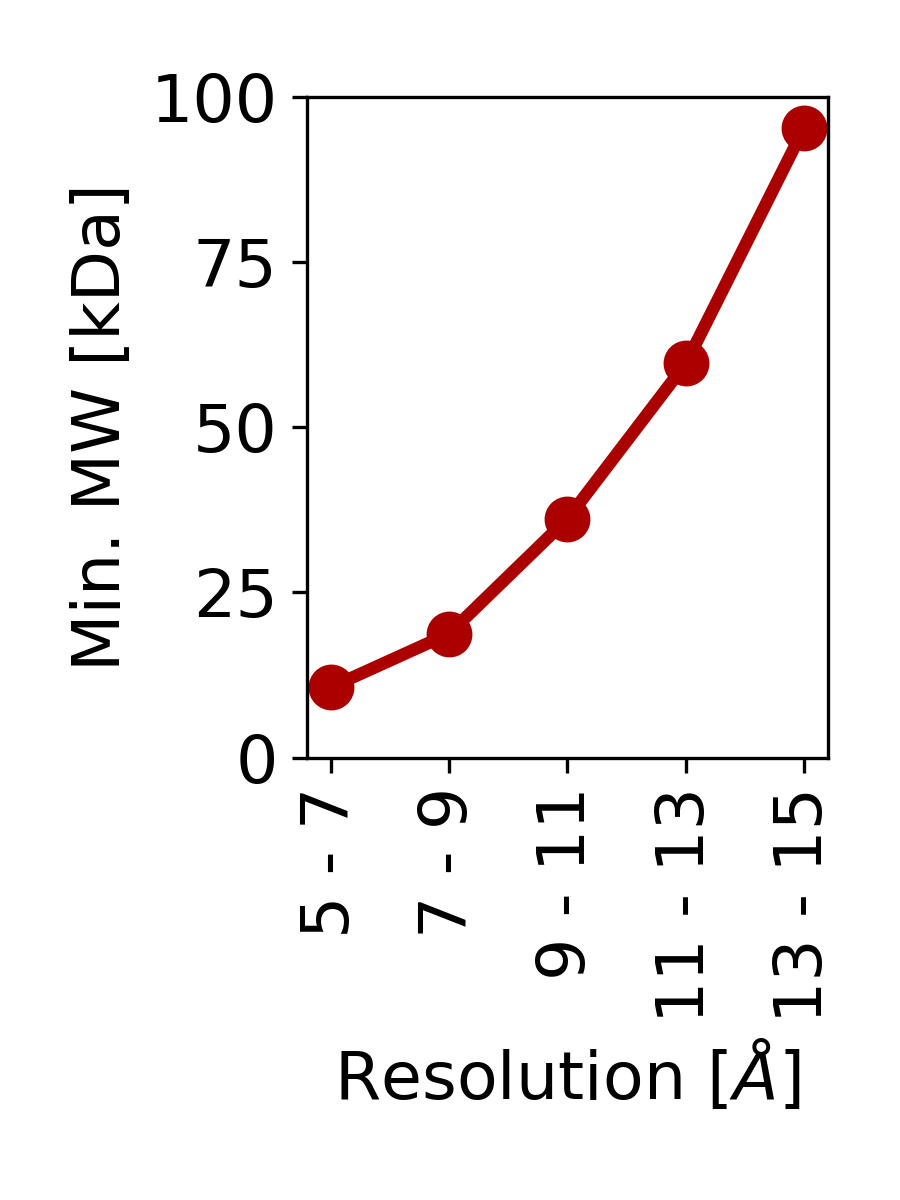
</div>

In [6]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("../Small_dataset/3j3u/emd_5609_processed.mrc", 10)
mad.add_subunit("../Small_dataset/3j3u/3j3u_subunit.pdb", 6)

mad.run(n_samples=100, cc_threshold=0.5)
mad.build_assembly()

MaD> Added: density map emd_5609_processed, resolution 10.00 A
MaD> Added: subunit ../Small_dataset/3j3u/3j3u_subunit.pdb
MaD> Created output folder: results/emd_5609_processed_3j3u_subunitx6_res10.000_iso0.000
MaD> 4639 descriptors for emd_5609_processed found in database
MaD> 862 descriptors for 3j3u_subunit found in database
MaD> Matching descriptors (emd_5609_processed vs. 3j3u_subunit) (cc = 0.50)...
MaD> Filtering descriptor pairs (map emd_5609_processed vs. structure 3j3u_subunit) (weight=4, n_samples=100*6)...
MaD> Refining emd_5609_processed in 3j3u_subunit...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
------------------------------------------
|  0 |   6.06 |     32 |   0.52 | 100.25 |
|  1 |   6.49 |     14 |   0.54 |  49.03 |
|  2 |   6.06 |     15 |   0.54 |  48.78 |
|  3 |   6.06 |     13 |   0.52 |  40.80 |
|  4 |   5.63 |     13 |   0.52 |  38.13 |
|  5 |   5.63 |     13 |   0.52 |  37.74 |
|  6 |   6.06 |      4 |   0.46 |  1

#### Kainate receptor GluK2 at 11.6 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

Here, the lower resolution means that individuals secondary elements are not distinguishable and are, instead, merged. As a result, a larger patch diameter needs to be considered in order to build reliable descriptors. As a result, a 24-voxel diameter patch (the voxel spacing at 1.324, yielding a patch of 32 A in diameter). A patch of 20 voxels (26.5 A in diameter) also yields the expected assembly, but more false positives are also highlighted.

Subunit B is also alternatively located at the positions of subunit A, but the conformational differences makes these locations score lower.

In [7]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("../Small_dataset_low/EMD-8290/8290_exp_map_processed.mrc", 11.6)
mad.add_subunit("../Small_dataset_low/EMD-8290/5kuh_subA.pdb", 2)
mad.add_subunit("../Small_dataset_low/EMD-8290/5kuh_subB.pdb", 2)

mad.run(patch_size=24)
mad.build_assembly()


MaD> Added: density map 8290_exp_map_processed, resolution 11.60 A
MaD> Added: subunit ../Small_dataset_low/EMD-8290/5kuh_subA.pdb
MaD> Added: subunit ../Small_dataset_low/EMD-8290/5kuh_subB.pdb
MaD> Created output folder: results/8290_exp_map_processed_5kuh_subAx2.5kuh_subBx2_res11.600_iso0.000
MaD> 1395 descriptors for 8290_exp_map_processed found in database
MaD> 764 descriptors for 5kuh_subA found in database
MaD> 838 descriptors for 5kuh_subB found in database
MaD> Matching descriptors (8290_exp_map_processed vs. 5kuh_subA) (cc = 0.60)...
MaD> Filtering descriptor pairs (map 8290_exp_map_processed vs. structure 5kuh_subA) (weight=4, n_samples=60*2)...
MaD> Refining 8290_exp_map_processed in 5kuh_subA...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
------------------------------------------
|  0 |   4.70 |     12 |   0.62 |  34.75 |
|  1 |   4.03 |     14 |   0.61 |  34.32 |
|  2 |   0.67 |      4 |   0.49 |   1.31 |
-----------------------

#### Beta-galactosidase at 13 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

In this assembly, we have 4 copies of B-galactosidase monomers along with small Fab domains. For similar reasons as in the MecA-ClpC complex, the Fab domains cannot be docked using our method due to their small sizes (we estimate a minimum size of 90 to 100 kDa for reliable docking with a resolution of 13 A) (see figure in the section of the MecA-ClpC example).

Indeed, at these resolutions, only smaller domains may be reliably observed in a density map. This usually means that descriptors should cover a larger volume to be reliable, but not too large to go beyond the size of the subunit. In this case, the voxel spacing is at 3 A, meaning that a subvolume of 3 * 16 voxels = 48 A of diamater is considered. To reduce it to a more manageable volume with less bias, we set the patch_size to 12 voxels instead (36 A in diameter). Other sizes may work as well, but not necessarily find all the expected localizations of the B-galactosidase.

The lower resolution requires to tweak the descriptor cross-correlation threshold to 0.5 (down from 0.6 by default) and the number of descriptor pairs for clustering (100, up from 60 by default).

Regardless, the first model built is the expected model (minus Fab domains).

In [8]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("../Small_dataset_low/EMD-2548/2548_exp_map_processed.mrc", 13)
mad.add_subunit("../Small_dataset_low/EMD-2548/4CKD_subunit.pdb", 4)

mad.run(n_samples=120, patch_size=12)
mad.build_assembly()

MaD> Added: density map 2548_exp_map_processed, resolution 13.00 A
MaD> Added: subunit ../Small_dataset_low/EMD-2548/4CKD_subunit.pdb
MaD> Created output folder: results/2548_exp_map_processed_4CKD_subunitx4_res13.000_iso0.000
MaD> 920 descriptors for 2548_exp_map_processed found in database
MaD> 379 descriptors for 4CKD_subunit found in database
MaD> Matching descriptors (2548_exp_map_processed vs. 4CKD_subunit) (cc = 0.60)...
MaD> Filtering descriptor pairs (map 2548_exp_map_processed vs. structure 4CKD_subunit) (weight=4, n_samples=120*4)...
MaD> Refining 2548_exp_map_processed in 4CKD_subunit...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
------------------------------------------
|  0 |  26.58 |     20 |   0.56 | 297.77 |
|  1 |  26.58 |     18 |   0.56 | 267.98 |
|  2 |  25.32 |     17 |   0.56 | 241.06 |
|  3 |  25.32 |     16 |   0.56 | 226.87 |
|  4 |   6.33 |     19 |   0.56 |  66.78 |
|  5 |   7.59 |      9 |   0.56 |  38.53 |
|  6 

#### Simulated assemblies

This section covers a set of 21 assemblies simulated at a resolution of 10 Å.

In general, if the file given to the add_map() function is a PDB file, it will be converted to a density map at the specified resolution. The resulting map is available in the "initial_files" folder of the results folder.

In [1]:
import os
from mad import MaD

# Chose assembly in the list
##################
assembly_list = ['1cs4','1gpq','1mda','1suv','1tyq','1vcb','1z5s',
                 '2bbk','2bo9','2dqj','2gc7','2uzx','2wvy','2y7h',
                 '3lu0','3nvq','3pdu','3puv','3r5d','3sfd','3v6d']
assembly = "3lu0"
##################

# Explore folder to get files and stoichiometry
path = "../Simulated_dataset"
ref = os.path.join(path, assembly, "%s.pdb"%assembly)
components = []
for c in os.listdir(os.path.join(path, assembly)):
    if len(c) == 8:
        continue
    else:
        n_copies = int(c.split("_")[-1].split(".")[0])
        components.append([os.path.join(os.path.join(path, assembly, c)), n_copies])
for c in components:
    print("%i x %s"%(c[1], c[0]))
print()

# Build MaD instance
mad = MaD.MaD()

# Add map and components
mad.add_map(ref, 10)
for c in components:
    sub, n_copies = c
    mad.add_subunit(sub, n_copies=n_copies)

# Run docking and assembly making
# > EXCEPTION: 1mda requires a lower descriptor CC threshold for one subunit.
# > Make sure to TRANSFORM subunits away from their fitted positions.
if assembly == "1mda":
    mad.run(transform_subunits=True, cc_threshold=0.5) # rotate/translate subunits out of assembly
else:
    mad.run(transform_subunits=True) # rotate/translate subunits out of assembly
    
# Build assembly
mad.build_assembly()

1 x ../Simulated_dataset\3lu0\3lu0_A_1.pdb
1 x ../Simulated_dataset\3lu0\3lu0_B_1.pdb
1 x ../Simulated_dataset\3lu0\3lu0_C_1.pdb
1 x ../Simulated_dataset\3lu0\3lu0_D_1.pdb
1 x ../Simulated_dataset\3lu0\3lu0_E_1.pdb

MaD> Added: density map 3lu0, resolution 10.00 A
MaD> Added: subunit ../Simulated_dataset\3lu0\3lu0_A_1.pdb
MaD> Added: subunit ../Simulated_dataset\3lu0\3lu0_B_1.pdb
MaD> Added: subunit ../Simulated_dataset\3lu0\3lu0_C_1.pdb
MaD> Added: subunit ../Simulated_dataset\3lu0\3lu0_D_1.pdb
MaD> Added: subunit ../Simulated_dataset\3lu0\3lu0_E_1.pdb
MaD> Created output folder: results/3lu0_3lu0_A_1x1.3lu0_B_1x1.3lu0_C_1x1.3lu0_D_1x1.3lu0_E_1x1_res10.000_iso0.000_1
MaD> PDB provided for density map: ../Simulated_dataset\3lu0\3lu0.pdb
     Simulating at specified resolution and voxel spacing of 1.2 angstroms
MaD> 6235 descriptors for 3lu0 found in database
MaD> 399 descriptors for 3lu0_A_1 found in database
MaD> 566 descriptors for 3lu0_B_1 found in database
MaD> 2506 descriptors for

# 3. Ensemble docking with GroEL